## 4. Entendimiento de imágenes de personas

>a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [1]:
import scipy.io as sio
import numpy as np
mat_train = sio.loadmat("./eventrain.mat")
mat_test = sio.loadmat("./eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]

In [2]:
print("train:",data_train[0].shape[0])
print("test:",data_test[0].shape[0])

train: 3500
test: 1050


Hay 3500 datos de entrenamiento y 1050 de testeo, los datos de entrenamiento seran divididos para generar un conjunto de validacion.

>b) Elija cuál representación utilizará para trabajar los datos y entregárselos como input al modelo de aprendizaje a utilizar, recuerde que puede utilizar una combinación de éstos si lo desea. Además extraiga las salidas/output del problema, en este caso, como ya se comentó, la edad. Describa los datos utilizados y la cantidad de datos por rango de edad.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.concatenate((data_train[0],data_train[3]),axis=1),data_train[1].ravel(), test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)

(2800, 51)
(700, 51)


hay 2800 datos de entrenamiento y 700 datos de validacion, el problema se vera como un problema de clasificacion donde las clases son 1, 5, 10, 16, 28, 51 y 75 . De la referencia, los 14 primeros atributos que se utilizaran para representar una imagen son los atributos contextuales:
1. xcenter         :(normalized from 0 to 100). Left to right image coord
2. ycenter              :    (normalized from 0 to 100). top to bottom image coord
3. minSpanningTreeDegree:
4. SizeRelativeToNeighbor:   >1 means face bigger than neighbor
5. PosX             :        % negative means neighbor to the right of face (in eye dist units)
6. PosY             :        % % negative means Face below NN
7. neiAngle         :      % Angle of neighbor Face. Left eye at center, Cartesian coord system
8. myAngle          :       % angle of current Face
9. SizeRelAverage   :        % face size relative to the average
10-11. [x y] position relative average. 
12. Size Relative to Planar FaceFit. 
13. Nearest Neighbor Gender   
14. NEarest Neighbor Agebin

Los ultimos 37 son la proyeccion de las imagenes al espacio de fisher: 

<img src="http://www.scholarpedia.org/w/images/thumb/b/b0/Fisherfaces.jpg/438px-Fisherfaces.jpg" width="20%" height="20%" />

Luego, se hace una normalizacion de los datos

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_prueba=scaler.transform(np.concatenate((data_test[0],data_test[3]),axis=1))
y_prueba=data_test[1].ravel()

>c) Defina y entrene modelos de aprendizaje para la inferencia de la edad de la persona a través de la representación escogida, se espera que experimente con distintas configuraciones, modelos e hiper-parámetros . Intente llegar a un MSE menor a 100 sobre la edad de las personas en el conjunto de pruebas. Recuerde que NO puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

# Arbol de Decision

Primero se implementara un arbol de decision en el que se variara su profundida maxima.

In [5]:
def mse(x,y):
    return np.mean((x - y)**2)

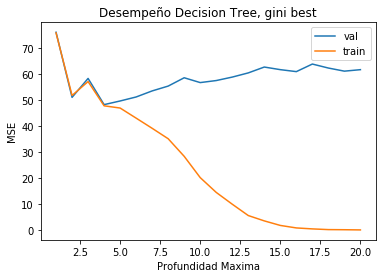

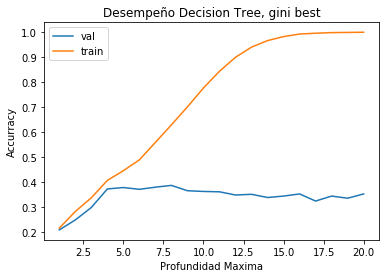

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree
import matplotlib.pyplot as plt



MSE_test=[]
MSE_train=[]
Acc_test=[]
Acc_train=[]

rango=21

model = Tree()
for depth in range(1,rango):
    model.set_params(max_depth=depth,criterion='gini',splitter='best')
    model.fit(X_train_scaled, y_train)
    
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    MSE_test.append(mse(y_test,y_pred_test))
    MSE_train.append(mse(y_train,y_pred_train))
    
    Acc_test.append(model.score(X_test_scaled,y_test))
    Acc_train.append(model.score(X_train_scaled,y_train))
    



    
plt.title("Desempeño Decision Tree, gini best")
plt.xlabel("Profundidad Maxima")
plt.ylabel("MSE")

plt.plot(range(1,rango),MSE_test,label="val")
plt.plot(range(1,rango),MSE_train,label="train")
plt.legend(loc="best")
plt.show()

plt.clf()

plt.title("Desempeño Decision Tree, gini best")
plt.xlabel("Profundidad Maxima")
plt.ylabel("Accurracy")

plt.plot(range(1,rango),Acc_test,label="val")
plt.plot(range(1,rango),Acc_train,label="train")
plt.legend(loc="best")
plt.show()

In [13]:

print("Mejor accuracy val=", max(Acc_test))
print("Mejor MSE val =", MSE_test[Acc_test.index(max(Acc_test))])

Mejor accuracy val= 0.38571428571428573
Mejor MSE val = 55.254285714285714


Observando tanto el grafico de MSE como el de accuracy queda claro que el modelo aproxima arbitrariamente al conjunto de validacion, esto implica un masivo overfitting. Por otro lado, el accuracy del conjunto de validacion llega a su tope de 0.39 para una profundida de 4,  por lo tanto el modelo solo necesita esta profunidad para obtener el mejor resultado posible.

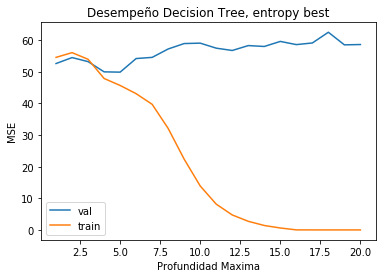

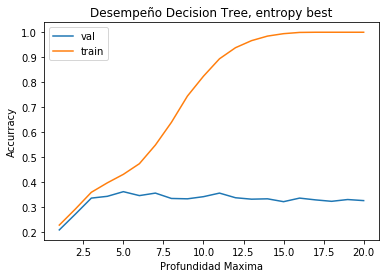

In [14]:
from sklearn.tree import DecisionTreeClassifier as Tree
import matplotlib.pyplot as plt



MSE_test=[]
MSE_train=[]
Acc_test=[]
Acc_train=[]

rango=21

model = Tree()
for depth in range(1,rango):
    model.set_params(max_depth=depth,criterion='entropy',splitter='best')
    model.fit(X_train_scaled, y_train)
    
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    MSE_test.append(mse(y_test,y_pred_test))
    MSE_train.append(mse(y_train,y_pred_train))
    
    Acc_test.append(model.score(X_test_scaled,y_test))
    Acc_train.append(model.score(X_train_scaled,y_train))
    



    
plt.title("Desempeño Decision Tree, entropy best")
plt.xlabel("Profundidad Maxima")
plt.ylabel("MSE")

plt.plot(range(1,rango),MSE_test,label="val")
plt.plot(range(1,rango),MSE_train,label="train")
plt.legend(loc="best")
plt.show()

plt.clf()

plt.title("Desempeño Decision Tree, entropy best")
plt.xlabel("Profundidad Maxima")
plt.ylabel("Accurracy")

plt.plot(range(1,rango),Acc_test,label="val")
plt.plot(range(1,rango),Acc_train,label="train")
plt.legend(loc="best")
plt.show()

In [15]:
print("Mejor accuracy val=", max(Acc_test))
print("Mejor MSE val =", MSE_test[Acc_test.index(max(Acc_test))])

Mejor accuracy val= 0.3628571428571429
Mejor MSE val = 49.91428571428571


Utilizando el criterio de entropia se obtienen resultados similares pero levemente peores, la unica diferencia visible es que es que hay un leve underfitting en el MSE para profundidades bajas.

# SVM

Se experimenta con una SVM, haciendo variar los parametros gamma y C de la SVM entre $[10^{-9},10^{3}]$ y $[10^{-2},10^{13}]$ respectivamente. Se utiliza la funcion GridSearchCV de sklearn, esta ocupa por defecto 3-fold Cross validation, esto implica pequeñas variaciones en los resultados.

The best parameters are {'C': 1000000.0, 'gamma': 1e-08} with a score of 0.46


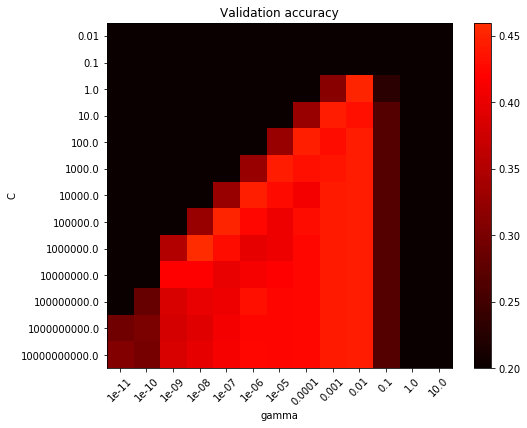

In [15]:

from sklearn.svm import SVC 

from matplotlib.colors import Normalize
from sklearn.model_selection import GridSearchCV
# funcion auxiliar

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


# #############################################################################
# Train classifiers

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-11, 1, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_test_scaled, y_test)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))



scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))

# Draw heatmap

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.5))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

Asi, el mejor accuracy para una SVM es 0.46 para los parametros $C= 10^6, \gamma= 10^{-8}$, se reentrena el modelo sobre el total de los datos, no utilizando validacion cruzada.

In [46]:


model= SVC()
model.set_params(C=1000000.0,gamma=1e-08,kernel='rbf')
model.fit(X_train_scaled, y_train)


y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

print("mse test:",mse(y_test,y_pred_test))
print("mse val :",mse(y_train,y_pred_train))

print("acc test:",model.score(X_test_scaled,y_test))
print("acc val :",model.score(X_train_scaled,y_train))




mse test: 38.52428571428572
mse val : 36.83607142857143
acc test: 0.49
acc val : 0.5478571428571428


Se logra aumentar a 0.547 el acurracy sobre el conjunto de validacion, esto es una mejora significativa. Tambien el MSE de  es menor 36.83 que para el caso de los arboles

# Red Neuronal

Por ultimo, se estudiara utilizando Redes Neuronales, para poder aplicarlas a un problema de clasificacion es necesario construir in vector de etiquetas categoricas, estas son de la forma $(0,..,1,..0)$, donde el vector vale 1 en la posicion de la clase que pertenece.

In [45]:
def tocat(x):
    if x==1:
        return 0
    if x==5:
        return 1
    if x==10:
        return 2
    if x==16:
        return 3
    if x==28:
        return 4
    if x==51:
        return 5
    if x==75:
        return 6

vfunc=np.vectorize(tocat)

def antihot(x):
    return np.argmax(x,axis=1)
    
def fromcat(x):

    if x==0:
        return 1
    if x==1:
        return 5
    if x==2:
        return 10
    if x==3:
        return 16
    if x==4:
        return 28
    if x==5:
        return 51
    if x==6:
        return 75
nfunc=np.vectorize(fromcat)

import keras 
y_onehot_train = keras.utils.to_categorical(vfunc(y_train),num_classes=7)
y_onehot_test = keras.utils.to_categorical(vfunc(y_test),num_classes=7)
print(y_onehot_train)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [23]:
nfunc(antihot(y_onehot_train))#funcion inversa de to_categorical

array([28, 28, 10, ..., 28, 51,  1])

Primero se entrena una red con una capa escondida de 10 neuronas con activacion relu, la ultima capa con funcion de activacion softmax debido a que estamos en problema de clasificacion.

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint




model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(y_onehot_train.shape[1], activation="softmax"))
model.compile(optimizer=SGD(lr=0.2), loss="categorical_crossentropy", metrics=["categorical_accuracy"])



checkpointer = ModelCheckpoint(filepath="bestweights.hdf5",verbose=1, save_best_only=True,monitor='val_categorical_accuracy')
hist=model.fit(X_train_scaled, y_onehot_train, epochs=100, batch_size=128,validation_data=(X_test_scaled,y_onehot_test), callbacks=[checkpointer],verbose=1)




Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 0s 42us/step - loss: 1.9075 - categorical_accuracy: 0.2364 - val_loss: 1.6622 - val_categorical_accuracy: 0.3186

Epoch 00001: val_categorical_accuracy improved from -inf to 0.31857, saving model to bestweights.hdf5
Epoch 2/100
2800/2800 [==============================] - 0s 7us/step - loss: 1.5909 - categorical_accuracy: 0.3464 - val_loss: 1.4922 - val_categorical_accuracy: 0.3943

Epoch 00002: val_categorical_accuracy improved from 0.31857 to 0.39429, saving model to bestweights.hdf5
Epoch 3/100
2800/2800 [==============================] - 0s 7us/step - loss: 1.4579 - categorical_accuracy: 0.4114 - val_loss: 1.4014 - val_categorical_accuracy: 0.4357

Epoch 00003: val_categorical_accuracy improved from 0.39429 to 0.43571, saving model to bestweights.hdf5
Epoch 4/100
2800/2800 [==============================] - 0s 7us/step - loss: 1.3776 - categorical_accuracy: 0.4436 - val_loss: 1.3

2800/2800 [==============================] - 0s 6us/step - loss: 1.1281 - categorical_accuracy: 0.5500 - val_loss: 1.3334 - val_categorical_accuracy: 0.4771

Epoch 00034: val_categorical_accuracy did not improve from 0.49429
Epoch 35/100
2800/2800 [==============================] - 0s 6us/step - loss: 1.1266 - categorical_accuracy: 0.5471 - val_loss: 1.3350 - val_categorical_accuracy: 0.4857

Epoch 00035: val_categorical_accuracy did not improve from 0.49429
Epoch 36/100
2800/2800 [==============================] - 0s 6us/step - loss: 1.1234 - categorical_accuracy: 0.5489 - val_loss: 1.3252 - val_categorical_accuracy: 0.4929

Epoch 00036: val_categorical_accuracy did not improve from 0.49429
Epoch 37/100
2800/2800 [==============================] - 0s 6us/step - loss: 1.1233 - categorical_accuracy: 0.5507 - val_loss: 1.3331 - val_categorical_accuracy: 0.4814

Epoch 00037: val_categorical_accuracy did not improve from 0.49429
Epoch 38/100
2800/2800 [==============================] - 0s 


Epoch 00068: val_categorical_accuracy did not improve from 0.49429
Epoch 69/100
2800/2800 [==============================] - 0s 5us/step - loss: 1.0862 - categorical_accuracy: 0.5657 - val_loss: 1.3526 - val_categorical_accuracy: 0.4743

Epoch 00069: val_categorical_accuracy did not improve from 0.49429
Epoch 70/100
2800/2800 [==============================] - 0s 5us/step - loss: 1.0854 - categorical_accuracy: 0.5593 - val_loss: 1.3520 - val_categorical_accuracy: 0.4643

Epoch 00070: val_categorical_accuracy did not improve from 0.49429
Epoch 71/100
2800/2800 [==============================] - 0s 5us/step - loss: 1.0861 - categorical_accuracy: 0.5661 - val_loss: 1.3459 - val_categorical_accuracy: 0.4714

Epoch 00071: val_categorical_accuracy did not improve from 0.49429
Epoch 72/100
2800/2800 [==============================] - 0s 5us/step - loss: 1.0826 - categorical_accuracy: 0.5675 - val_loss: 1.3393 - val_categorical_accuracy: 0.4757

Epoch 00072: val_categorical_accuracy did not i

In [28]:

model.load_weights("bestweights.hdf5")

print("Accuracy train:", model.evaluate(X_train_scaled,y_onehot_train,verbose=0)[1])
print("Accuracy val:", model.evaluate(X_test_scaled,y_onehot_test,verbose=0)[1])

print("mse train:",mse(nfunc(antihot(model.predict(X_train_scaled))), y_train))
print("mse val:",mse(nfunc(antihot(model.predict(X_test_scaled))), y_test))

Accuracy train: 0.58
Accuracy val: 0.49714285714285716
mse train: 337.61571428571426
mse val: 407.02714285714285


Se obtiene un accuracy de 0.497 mejor que los arboles pero peor que la SVM, tambien se obtiene un MSE muy alto de 407.

Luego, se prueba si aumentando los parametros libres del problema se obtienen mejores resultados, utilizando una red de 4 capas escondidas con 100 neuronas cada una y funcion de activacion relu, tambien se ocupan las capas "Dropout" que desactivan una proporcion de las neuronas durante el entrenamiento, esto con el fin de regularizar la red y reducir el overfitting.

In [37]:


model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(y_onehot_train.shape[1], activation="softmax"))
model.compile(optimizer=SGD(lr=0.2), loss="categorical_crossentropy", metrics=["categorical_accuracy"])



checkpointer = ModelCheckpoint(filepath="bestweights.hdf5",verbose=1, save_best_only=True,monitor='val_categorical_accuracy')
hist=model.fit(X_train_scaled, y_onehot_train, epochs=100, batch_size=128,validation_data=(X_test_scaled,y_onehot_test), callbacks=[checkpointer],verbose=1)




Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 0s 104us/step - loss: 2.0345 - categorical_accuracy: 0.2146 - val_loss: 1.7515 - val_categorical_accuracy: 0.3186

Epoch 00001: val_categorical_accuracy improved from -inf to 0.31857, saving model to bestweights.hdf5
Epoch 2/100
2800/2800 [==============================] - 0s 19us/step - loss: 1.7807 - categorical_accuracy: 0.2761 - val_loss: 1.5718 - val_categorical_accuracy: 0.4129

Epoch 00002: val_categorical_accuracy improved from 0.31857 to 0.41286, saving model to bestweights.hdf5
Epoch 3/100
2800/2800 [==============================] - 0s 16us/step - loss: 1.6488 - categorical_accuracy: 0.3296 - val_loss: 1.4703 - val_categorical_accuracy: 0.4371

Epoch 00003: val_categorical_accuracy improved from 0.41286 to 0.43714, saving model to bestweights.hdf5
Epoch 4/100
2800/2800 [==============================] - 0s 14us/step - loss: 1.5673 - categorical_accuracy: 0.3557 - val_loss:


Epoch 00033: val_categorical_accuracy did not improve from 0.51286
Epoch 34/100
2800/2800 [==============================] - 0s 14us/step - loss: 1.1996 - categorical_accuracy: 0.5161 - val_loss: 1.2572 - val_categorical_accuracy: 0.4900

Epoch 00034: val_categorical_accuracy did not improve from 0.51286
Epoch 35/100
2800/2800 [==============================] - 0s 13us/step - loss: 1.1916 - categorical_accuracy: 0.5229 - val_loss: 1.2408 - val_categorical_accuracy: 0.5029

Epoch 00035: val_categorical_accuracy did not improve from 0.51286
Epoch 36/100
2800/2800 [==============================] - 0s 13us/step - loss: 1.1887 - categorical_accuracy: 0.5289 - val_loss: 1.2434 - val_categorical_accuracy: 0.4957

Epoch 00036: val_categorical_accuracy did not improve from 0.51286
Epoch 37/100
2800/2800 [==============================] - 0s 12us/step - loss: 1.1601 - categorical_accuracy: 0.5243 - val_loss: 1.2378 - val_categorical_accuracy: 0.5014

Epoch 00037: val_categorical_accuracy did n

2800/2800 [==============================] - 0s 12us/step - loss: 1.0588 - categorical_accuracy: 0.5689 - val_loss: 1.2223 - val_categorical_accuracy: 0.5114

Epoch 00068: val_categorical_accuracy did not improve from 0.53286
Epoch 69/100
2800/2800 [==============================] - 0s 12us/step - loss: 1.0634 - categorical_accuracy: 0.5786 - val_loss: 1.2332 - val_categorical_accuracy: 0.5057

Epoch 00069: val_categorical_accuracy did not improve from 0.53286
Epoch 70/100
2800/2800 [==============================] - 0s 12us/step - loss: 1.0443 - categorical_accuracy: 0.5918 - val_loss: 1.2429 - val_categorical_accuracy: 0.5143

Epoch 00070: val_categorical_accuracy did not improve from 0.53286
Epoch 71/100
2800/2800 [==============================] - 0s 12us/step - loss: 1.0460 - categorical_accuracy: 0.5739 - val_loss: 1.2345 - val_categorical_accuracy: 0.5014

Epoch 00071: val_categorical_accuracy did not improve from 0.53286
Epoch 72/100
2800/2800 [==============================] -

In [38]:

model.load_weights("bestweights.hdf5")

print("Accuracy train:", model.evaluate(X_train_scaled,y_onehot_train,verbose=0)[1])
print("Accuracy val:", model.evaluate(X_test_scaled,y_onehot_test,verbose=0)[1])

print("mse train:",mse(nfunc(antihot(model.predict(X_train_scaled))), y_train))
print("mse val:",mse(nfunc(antihot(model.predict(X_test_scaled))), y_test))

Accuracy train: 0.6632142857142858
Accuracy val: 0.5328571425165449
mse train: 216.78857142857143
mse val: 317.63142857142856


# Conclusiones

De los resultados obtenidos en el conjunto de validacion se construye la siguiente tabla resumen:

|          |Tree gini |Tree entropy | SVM|Red Neuronal 1| Red Neuronal 2|
|------    |------    |------| ------|-|-|
|   MSE    | 55.25    | 49.91| 36.83|407.02|317.63
|   Acc    |0.3857    | 0.362| 0.547|0.497|0.532


Asi, se concluye que el mejor modelo es la SVM, sin embargo, se conjetura que ocupando tecnicas novedosas sobre la red neuronal se puede obtener mejores resultados. Ya que a pesar de todo, la SVM y la red no difieren mucho en su calidad pero la ultima permite mucha mas flexibilidad para su construccion.

In [50]:


model= SVC()
model.set_params(C=1000000.0,gamma=1e-08,kernel='rbf')
model.fit(X_train_scaled, y_train)


y_pred_prueba = model.predict(X_prueba)

print("mse test:",mse(y_prueba,y_pred_prueba))

print("acc test:",model.score(X_prueba,y_prueba))



mse test: 48.78095238095238
acc test: 0.42095238095238097


Por ultimo, se evalua el modelo en el conjunto de prueba apartado al comienzo, y se obtiene un acurracy de 0.42, lo que es peor que los resultados experimentales pero mucho mejor a la eleccion aleatoria de 0.14.